In [4]:
libraries = c("dplyr","magrittr","tidyr","ggplot2","readxl","RColorBrewer","zoo",
              "readxl","writexl","gridExtra","MASS","ConnMatTools")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE,quietly=TRUE) }

'%&%' = function(x,y)paste0(x,y)

theme_set(theme_bw())
version$version.string

[1] "R version 4.0.3 (2020-10-10)"

In [5]:
Start_date <- as.Date("2020-02-24")
new_Start_date <- as.Date("2020-03-15")

Final_date <- as.Date("2021-01-31")

In [6]:
read.csv("density_data.csv") -> Density
prefecture_name <- Density$prefecture
length(prefecture_name)

[1] 47

# Google mobility data

In [7]:
# library("COVID19")

# gmr <- "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
# x <- covid19(country = c("Japan"), level = 2, start = Start_date, end = as.Date("2021-05-14"), gmr = gmr)

# write.csv(x, "x2.csv")

In [8]:
read.csv("x.csv") -> google_dt
cbind(google_dt[,1], google_dt[,2], google_dt[,32], google_dt[,44:49]) -> google_final_dt

colnames(google_final_dt) <- c("X", "date", "prefecture", 
                               "retail", "grocery","parks","transit","workplaces","residential")

google_final_dt$date <- as.Date(as.Date(google_final_dt$date, "%Y-%m-%d"))

In [9]:
google_final_dt %>% head()

,X,date,prefecture,retail,grocery,parks,transit,workplaces,residential
,<int>,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2020-02-24,Nara,18,4,54,-27,-55,14
2,2,2020-02-25,Nara,0,7,0,-2,1,1
3,3,2020-02-26,Nara,-4,3,-5,-5,1,1
4,4,2020-02-27,Nara,-3,6,-4,-7,0,1
5,5,2020-02-28,Nara,-2,14,-4,-10,1,2
6,6,2020-02-29,Nara,-10,9,-22,-21,3,4


# Population density data

In [10]:
Density %<>% mutate(normal_density = density/sum(density))

merge(google_final_dt, Density, by="prefecture", all.x=TRUE) -> google_final_dt
google_final_dt %<>% filter(date >= Start_date) %>% filter(date <= Final_date) %>% arrange(prefecture, date)

google_final_dt %>% head()

,prefecture,X,date,retail,grocery,parks,transit,workplaces,residential,density,popsize,normal_density
,<chr>,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Aichi,17889,2020-02-24,18,4,54,-27,-55,14,1447,7552,0.04697289
2,Aichi,17890,2020-02-25,0,7,0,-2,1,1,1447,7552,0.04697289
3,Aichi,17891,2020-02-26,-4,3,-5,-5,1,1,1447,7552,0.04697289
4,Aichi,17892,2020-02-27,-3,6,-4,-7,0,1,1447,7552,0.04697289
5,Aichi,17893,2020-02-28,-2,14,-4,-10,1,2,1447,7552,0.04697289
6,Aichi,17894,2020-02-29,-10,9,-22,-21,3,4,1447,7552,0.04697289


# Temperature data

In [11]:
# read.csv("temp_add.csv", header=FALSE) -> temp_add
# temp_add2 <- temp_add[,1:48]

# for(i in 1:47){
#     temp_add[,(i*3-1)] -> temp_add2[,(i+1)]
# }

# read.csv("temp_data.csv") -> temp_data
# temp_data %<>% dplyr::select(-X)
# colnames(temp_add2) <- colnames(temp_data)
# rbind(temp_data, temp_add2) -> temp_data

# write.csv(temp_data, "temp_data.csv")

# temp_data %>% tail()

In [12]:
read.csv("temp_data.csv") -> temp_data
temp_data <- temp_data[,-1]

as.Date(temp_data$date, "%m/%d/%Y") -> temp_data$date

temp_data %>% gather(date, temperature) -> temp1
colnames(temp1) <- c("prefecture", "temperature")

rep(temp_data$date, length(prefecture_name)) %>% as.data.frame() -> temp2
colnames(temp2) <- c("date")

cbind(temp1, temp2) -> temp_data
temp_data %<>% dplyr::select(date, prefecture, temperature) %>% filter(date >= Start_date) %>% filter(date <= Final_date)

## Intermediate merge of Google mobility and Temperature data

In [13]:
merge(google_final_dt, temp_data, by=c("date", "prefecture")) -> data_gootemp
data_gootemp %>% head()
data_gootemp %>% tail()

,date,prefecture,X,retail,grocery,parks,transit,workplaces,residential,density,popsize,normal_density,temperature
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2020-02-24,Aichi,17889,18,4,54,-27,-55,14,1447,7552,0.046972894,8.8
2,2020-02-24,Akita,16225,18,4,54,-27,-55,14,88,966,0.002856679,6.9
3,2020-02-24,Aomori,6241,18,4,54,-27,-55,14,136,1246,0.004414868,3.9
4,2020-02-24,Chiba,14561,18,4,54,-27,-55,14,1207,6259,0.039181951,10.4
5,2020-02-24,Ehime,9153,18,4,54,-27,-55,14,244,1339,0.007920792,8.9
6,2020-02-24,Fukui,7905,18,4,54,-27,-55,14,188,768,0.006102905,7.7


,date,prefecture,X,retail,grocery,parks,transit,workplaces,residential,density,popsize,normal_density,temperature
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
16116,2021-01-31,Tottori,2007,-19,-3,-16,-38,-10,6,164,556,0.005323811,4.6
16117,2021-01-31,Toyama,14071,-19,-3,-16,-38,-10,6,251,1044,0.008148028,2.3
16118,2021-01-31,Wakayama,8663,-19,-3,-16,-38,-10,6,204,925,0.006622302,7.5
16119,2021-01-31,Yamagata,7831,-19,-3,-16,-38,-10,6,121,1078,0.003927934,-1.4
16120,2021-01-31,Yamaguchi,1591,-19,-3,-16,-38,-10,6,230,1358,0.007466320,5.6
16121,2021-01-31,Yamanashi,3671,-19,-3,-16,-38,-10,6,187,811,0.006070443,3.8


# Rt data

## Selecting specific prefectures before Rt

In [14]:
(prefecture_name <- c("Osaka", "Tokyo", "Aichi", "Hokkaido"))
length(prefecture_name)

data_gootemp %<>% filter(prefecture %in% prefecture_name)

[1] "Osaka"    "Tokyo"    "Aichi"    "Hokkaido"

[1] 4

In [16]:
## making directory as an object
src_dir <- c("../../TokyoEOC_Real_time-Reff-Tokyo-2020/scripts/Sungmok/excels")
scr_file <- list.files(src_dir)

scr_files <- rep(0, length(prefecture_name))

for (i in 1:length(prefecture_name)){
scr_file[grep(prefecture_name[i], scr_file)] -> scr_files[i]}

scr_files

[1] "Osaka_Rt.csv"    "Tokyo_Rt.csv"    "Aichi_Rt.csv"    "Hokkaido_Rt.csv"

In [17]:
read_data <- list()

for (i in 1:length(scr_files)){
  assign(paste0("Rt_", prefecture_name[i]), 
         read.csv(paste0(src_dir, "/", scr_files[i])) %>% mutate(prefecture = prefecture_name[i]) %>%
         dplyr::select(prefecture, onset, imported_delay, domestic_delay, Rt, lower, upper) %>% 
         rename(date = onset) %>%
         filter(date <= Final_date) %>% filter(!is.na(Rt)) %>%
         mutate(date = as.Date(date))) -> read_data[[i]]}

# Final data

In [18]:
do.call("rbind", read_data) -> final_Rt

merge(data_gootemp, final_Rt, by=c("date", "prefecture")) -> final_data

final_data %<>% filter(date >= Start_date) %>% filter(date <= Final_date) %>% filter(!is.na(Rt)) %>%
arrange(prefecture, date)

final_data %>% head()

,date,prefecture,X,retail,grocery,parks,transit,workplaces,residential,density,popsize,normal_density,temperature,imported_delay,domestic_delay,Rt,lower,upper
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-02-24,Aichi,17889,18,4,54,-27,-55,14,1447,7552,0.04697289,8.8,0.34094816,2.445036,0.6314886,0.14,1.78
2,2020-02-25,Aichi,17890,0,7,0,-2,1,1,1447,7552,0.04697289,8.6,0.30431286,2.422954,0.6292124,0.13,1.78
3,2020-02-26,Aichi,17891,-4,3,-5,-5,1,1,1447,7552,0.04697289,10.8,0.15232624,3.164566,0.8484080,0.23,2.15
4,2020-02-27,Aichi,17892,-3,6,-4,-7,0,1,1447,7552,0.04697289,6.8,0.04383969,4.734461,1.3319541,0.47,2.91
5,2020-02-28,Aichi,17893,-2,14,-4,-10,1,2,1447,7552,0.04697289,6.9,0.03438756,6.631267,1.9410919,0.82,3.81
6,2020-02-29,Aichi,17894,-10,9,-22,-21,3,4,1447,7552,0.04697289,7.7,0.11628163,8.238059,2.3937786,1.11,4.41


# Merging the number of reported cases on day t

In [19]:
read.csv("../../TokyoEOC_Real_time-Reff-Tokyo-2020/scripts/Sungmok/reported.csv") -> temp
temp %<>% filter(prefecture %in% c("Osaka", "Tokyo", "Aichi", "Hokkaido")) %>% 
rename(date = reported) %>% rename(reported = n)

temp %<>%
filter(date >= Start_date) %>% filter(date <= Final_date) %>%
dplyr::select(-t) %>% dplyr::select(-X)


# temp$reported[temp$reported>=upper_boundary] <- upper_boundary

temp %>% head()

,date,reported,prefecture
,<chr>,<int>,<chr>
1,2020-02-24,6,Hokkaido
2,2020-02-25,1,Hokkaido
3,2020-02-26,8,Hokkaido
4,2020-02-27,15,Hokkaido
5,2020-02-28,12,Hokkaido
6,2020-02-29,4,Hokkaido


In [20]:
(as.Date(min(temp$date))-1 -> first_date)
(temp %>% filter(prefecture==c("Hokkaido")) %>% nrow() -> max_row)

temp_reported <- list()

for (g in 1:4){
    
    temp %>% filter(prefecture==prefecture_name[g]) %>% arrange(date) %>% mutate(rel_reported =0) -> tempp
    
    for (l in 1:max_row){
        tempp %>% filter(prefecture==prefecture_name[g]) %>% filter(date <= as.Date(first_date + l)) -> temp_rel
        max(temp_rel$reported) -> max_reported
        temp_rel %<>% mutate(rel_reported = reported / max_reported)
        temp_rel[nrow(temp_rel),] -> tempp[l,]  
    }
    
    tempp[is.na(tempp)] <- 0
    tempp -> temp_reported[[g]]
}

temp_rel_reported <- do.call("rbind", temp_reported)
temp_rel_reported %>% head()

[1] "2020-02-23"

[1] 343

,date,reported,prefecture,rel_reported
,<chr>,<int>,<chr>,<dbl>
1,2020-02-24,0,Osaka,0
2,2020-02-25,0,Osaka,0
3,2020-02-26,0,Osaka,0
4,2020-02-27,1,Osaka,1
5,2020-02-28,2,Osaka,1
6,2020-02-29,0,Osaka,0


In [21]:
merge(final_data, temp_rel_reported, by=c("date", "prefecture")) -> final_data
final_data %<>% arrange(prefecture, date)
final_data %>% head()

,date,prefecture,X,retail,grocery,parks,transit,workplaces,residential,density,popsize,normal_density,temperature,imported_delay,domestic_delay,Rt,lower,upper,reported,rel_reported
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2020-02-24,Aichi,17889,18,4,54,-27,-55,14,1447,7552,0.04697289,8.8,0.34094816,2.445036,0.6314886,0.14,1.78,0,0.0
2,2020-02-25,Aichi,17890,0,7,0,-2,1,1,1447,7552,0.04697289,8.6,0.30431286,2.422954,0.6292124,0.13,1.78,3,1.0
3,2020-02-26,Aichi,17891,-4,3,-5,-5,1,1,1447,7552,0.04697289,10.8,0.15232624,3.164566,0.8484080,0.23,2.15,5,1.0
4,2020-02-27,Aichi,17892,-3,6,-4,-7,0,1,1447,7552,0.04697289,6.8,0.04383969,4.734461,1.3319541,0.47,2.91,2,0.4
5,2020-02-28,Aichi,17893,-2,14,-4,-10,1,2,1447,7552,0.04697289,6.9,0.03438756,6.631267,1.9410919,0.82,3.81,1,0.2
6,2020-02-29,Aichi,17894,-10,9,-22,-21,3,4,1447,7552,0.04697289,7.7,0.11628163,8.238059,2.3937786,1.11,4.41,1,0.2


In [22]:
final_data %>% tail()

,date,prefecture,X,retail,grocery,parks,transit,workplaces,residential,density,popsize,normal_density,temperature,imported_delay,domestic_delay,Rt,lower,upper,reported,rel_reported
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1367,2021-01-26,Tokyo,16978,-20,-5,-21,-31,-14,8,6169,13921,0.2002597,7.5,0,415.3956,0.6095432,0.56,0.67,1026,0.3956807
1368,2021-01-27,Tokyo,16979,-22,-6,-24,-33,-14,8,6169,13921,0.2002597,10.3,0,435.7300,0.6852866,0.63,0.75,979,0.3775550
1369,2021-01-28,Tokyo,16980,-23,-7,-29,-33,-14,8,6169,13921,0.2002597,4.4,0,481.2168,0.8189818,0.75,0.89,1066,0.4111068
1370,2021-01-29,Tokyo,16981,-26,-8,-30,-34,-13,9,6169,13921,0.2002597,5.3,0,518.3930,0.9542584,0.88,1.03,874,0.3370613
1371,2021-01-30,Tokyo,16982,-21,-3,-28,-37,-12,8,6169,13921,0.2002597,4.1,0,514.9427,1.0102395,0.93,1.10,771,0.2973390
1372,2021-01-31,Tokyo,16983,-19,-3,-16,-38,-10,6,6169,13921,0.2002597,5.4,0,467.0886,0.9518922,0.87,1.04,635,0.2448901


# Merging the number of news articles on day t

In [23]:
read.csv("../../Kyoto_COVID_Rt_forecasting/data/news_01Apr2021.csv") -> temp
temp$date <- as.Date(temp$date, "%m/%d/%Y")

temp %<>% filter(date>=as.Date(min(final_data$date))) %>% 
filter(date<=as.Date(max(final_data$date))) %>% arrange(date)

temp %>% head()

,date,news
,<date>,<dbl>
1,2020-02-24,122
2,2020-02-25,203
3,2020-02-26,225
4,2020-02-27,228
5,2020-02-28,245
6,2020-02-29,157


In [24]:
temp %>% mutate(prefecture=c("Tokyo")) -> Tokyo_temp
temp %>% mutate(prefecture=c("Osaka")) -> Osaka_temp
temp %>% mutate(prefecture=c("Aichi")) -> Aichi_temp
temp %>% mutate(prefecture=c("Hokkaido")) -> Hokkaido_temp

rbind(Tokyo_temp, Osaka_temp, Aichi_temp, Hokkaido_temp) -> temp

merge(final_data, temp, by=c("date", "prefecture")) -> final_data
final_data %<>% arrange(prefecture, date)
final_data %>% head()

,date,prefecture,X,retail,grocery,parks,transit,workplaces,residential,density,⋯,normal_density,temperature,imported_delay,domestic_delay,Rt,lower,upper,reported,rel_reported,news
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,2020-02-24,Aichi,17889,18,4,54,-27,-55,14,1447,⋯,0.04697289,8.8,0.34094816,2.445036,0.6314886,0.14,1.78,0,0.0,122
2,2020-02-25,Aichi,17890,0,7,0,-2,1,1,1447,⋯,0.04697289,8.6,0.30431286,2.422954,0.6292124,0.13,1.78,3,1.0,203
3,2020-02-26,Aichi,17891,-4,3,-5,-5,1,1,1447,⋯,0.04697289,10.8,0.15232624,3.164566,0.8484080,0.23,2.15,5,1.0,225
4,2020-02-27,Aichi,17892,-3,6,-4,-7,0,1,1447,⋯,0.04697289,6.8,0.04383969,4.734461,1.3319541,0.47,2.91,2,0.4,228
5,2020-02-28,Aichi,17893,-2,14,-4,-10,1,2,1447,⋯,0.04697289,6.9,0.03438756,6.631267,1.9410919,0.82,3.81,1,0.2,245
6,2020-02-29,Aichi,17894,-10,9,-22,-21,3,4,1447,⋯,0.04697289,7.7,0.11628163,8.238059,2.3937786,1.11,4.41,1,0.2,157


# Moving average

In [25]:
MV <- 7

In [26]:
temp <- list()

for (i in 1:length(prefecture_name)){

final_data %>% filter(prefecture==prefecture_name[i]) -> final_data_MV
final_data_MV %<>% arrange()

MVA <- rep(0, nrow(final_data_MV))
MVA_lower <- rep(0, nrow(final_data_MV)); MVA_upper <- rep(0, nrow(final_data_MV));
MVA_temp <- rep(0, nrow(final_data_MV));
MVA_retail <- rep(0, nrow(final_data_MV)); MVA_grocery <- rep(0, nrow(final_data_MV)); 
MVA_parks <- rep(0, nrow(final_data_MV)); MVA_transit <- rep(0, nrow(final_data_MV)); 
MVA_workplaces <- rep(0, nrow(final_data_MV)); MVA_residential <- rep(0, nrow(final_data_MV))
MVA_google <- rep(0, nrow(final_data_MV)); MVA_google_back <- rep(0, nrow(final_data_MV));
MVA_reported <- rep(0, nrow(final_data_MV)); MVA_reported_normal <- rep(0, nrow(final_data_MV))    
MVA_news <- rep(0, nrow(final_data_MV))
    

## Moving average of Rt
for (h in 1:nrow(final_data_MV)){    
    if(h<=(MV-1)) {MVA[h] = sum(final_data_MV$Rt[1:h])/h}  
    else {MVA[h] = (MVA[h] = sum(final_data_MV$Rt[(h-(MV-1)):h])/MV)}
}

## Moving average of Rt_lower
for (h in 1:nrow(final_data_MV)){    
    if(h<=(MV-1)) {MVA_lower[h] = sum(final_data_MV$lower[1:h])/h}  
    else {MVA_lower[h] = (MVA_lower[h] = sum(final_data_MV$lower[(h-(MV-1)):h])/MV)}
}

## Moving average of Rt_upper
for (h in 1:nrow(final_data_MV)){    
    if(h<=(MV-1)) {MVA_upper[h] = sum(final_data_MV$upper[1:h])/h}  
    else {MVA_upper[h] = (MVA_upper[h] = sum(final_data_MV$upper[(h-(MV-1)):h])/MV)}
}

## Moving average of Temperature
for (k in 1:nrow(final_data_MV)){    
    if(k<=(MV-1)) {MVA_temp[k] = sum(final_data_MV$temperature[1:k])/k}  
    else {MVA_temp[k] = (MVA_temp[k] = sum(final_data_MV$temperature[(k-(MV-1)):k])/MV)}
}


## Moving average of Google mobility
for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_retail[g] = sum(final_data_MV$retail[1:g])/g}  
    else {MVA_retail[g] = (MVA_retail[g] = sum(final_data_MV$retail[(g-(MV-1)):g])/MV)}
}

for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_grocery[g] = sum(final_data_MV$grocery[1:g])/g}  
    else {MVA_grocery[g] = (MVA_grocery[g] = sum(final_data_MV$grocery[(g-(MV-1)):g])/MV)}
}

for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_parks[g] = sum(final_data_MV$parks[1:g])/g}  
    else {MVA_parks[g] = (MVA_parks[g] = sum(final_data_MV$parks[(g-(MV-1)):g])/MV)}
}

for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_transit[g] = sum(final_data_MV$transit[1:g])/g}  
    else {MVA_transit[g] = (MVA_transit[g] = sum(final_data_MV$transit[(g-(MV-1)):g])/MV)}
}

for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_workplaces[g] = sum(final_data_MV$workplaces[1:g])/g}  
    else {MVA_workplaces[g] = (MVA_workplaces[g] = sum(final_data_MV$workplaces[(g-(MV-1)):g])/MV)}
}

for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_residential[g] = sum(final_data_MV$residential[1:g])/g}  
    else {MVA_residential[g] = (MVA_residential[g] = sum(final_data_MV$residential[(g-(MV-1)):g])/MV)}
}

for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_google[g] = sum(final_data_MV$google[1:g])/g}  
    else {MVA_google[g] = (MVA_google[g] = sum(final_data_MV$google[(g-(MV-1)):g])/MV)}
}

for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_google_back[g] = sum(final_data_MV$google_back[1:g])/g}  
    else {MVA_google_back[g] = (MVA_google_back[g] = sum(final_data_MV$google_back[(g-(MV-1)):g])/MV)}
}
    
for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_reported[g] = sum(final_data_MV$reported[1:g])/g}  
    else {MVA_reported[g] = (MVA_reported[g] = sum(final_data_MV$reported[(g-(MV-1)):g])/MV)}
}
    
    
for (g in 1:nrow(final_data_MV)){    
    if(g<=(MV-1)) {MVA_news[g] = sum(final_data_MV$news[1:g])/g}  
    else {MVA_news[g] = (MVA_news[g] = sum(final_data_MV$news[(g-(MV-1)):g])/MV)}
}

cbind(final_data_MV, as.data.frame(MVA), as.data.frame(MVA_lower), as.data.frame(MVA_upper),
      as.data.frame(MVA_temp), 
      as.data.frame(MVA_retail), as.data.frame(MVA_grocery), as.data.frame(MVA_parks), 
      as.data.frame(MVA_transit), as.data.frame(MVA_workplaces), as.data.frame(MVA_residential),
      as.data.frame(MVA_google), as.data.frame(MVA_google_back),
      as.data.frame(MVA_reported),  as.data.frame(MVA_news)) -> temp[[i]]

}
                                                                         
do.call("rbind", temp) -> final_data_MV                                                                         


## cutting smoothened values for main analysis
final_data_MV %<>% filter(date>=new_Start_date) %>% arrange(prefecture, date)
final_data_MV %>% head()

,date,prefecture,X,retail,grocery,parks,transit,workplaces,residential,density,⋯,MVA_retail,MVA_grocery,MVA_parks,MVA_transit,MVA_workplaces,MVA_residential,MVA_google,MVA_google_back,MVA_reported,MVA_news
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-03-15,Aichi,17909,-7,5,9,-21,-3,3,1447,⋯,-6.857143,1.714286,-1.142857,-18.42857,-4.285714,4.428571,0,0,5.857143,977.8571
2,2020-03-16,Aichi,17910,-7,0,-7,-15,-3,4,1447,⋯,-6.857143,1.428571,-3.714286,-18.42857,-4.285714,4.428571,0,0,5.285714,1030.0000
3,2020-03-17,Aichi,17911,-1,4,14,-15,-4,4,1447,⋯,-5.714286,2.428571,2.285714,-18.00000,-4.142857,4.142857,0,0,3.714286,1060.5714
4,2020-03-18,Aichi,17912,-3,3,20,-14,-4,3,1447,⋯,-5.714286,2.285714,3.285714,-17.71429,-4.142857,4.142857,0,0,3.714286,1078.4286
5,2020-03-19,Aichi,17913,4,6,17,-10,-4,2,1447,⋯,-4.714286,2.428571,3.428571,-17.00000,-4.142857,4.000000,0,0,3.285714,1088.4286
6,2020-03-20,Aichi,17914,7,6,40,-34,-54,17,1447,⋯,-3.000000,2.857143,7.714286,-19.42857,-11.285714,5.714286,0,0,3.571429,1019.1429


# Intervention

In [27]:
final_data_MV %<>% mutate(intervention = 
                          case_when(date>= as.Date("2020-04-07") & date<as.Date("2020-05-21") ~ 1, ## emergency
                                    
                          prefecture == c("Osaka") &
                                    date>= as.Date("2020-07-28") & date<as.Date("2020-08-31") ~ 1, ## No drinking party    
                                    
                          prefecture == c("Osaka") &
                                    date>= as.Date("2020-11-24") ~ 1, ## Closing the Susukino from 9pm
                                    
#                           prefecture == c("Tokyo") &
#                                     date>= as.Date("2020-03-30") & date<as.Date("2020-04-07") ~ 1, ## stay-at-home
                                    
                          prefecture == c("Tokyo") &
                                    date>= as.Date("2020-05-21") & date<as.Date("2020-05-25") ~ 1, ## emergency difference
                        
                          prefecture == c("Tokyo") &
                                    date>= as.Date("2020-08-03") & date<as.Date("2020-08-31") ~ 1, ## Closing from 10pm
                        
                          prefecture == c("Tokyo") &
                                    date>= as.Date("2020-11-28") & date<as.Date("2021-02-07") ~ 1, ## closing from 10pm  
                                    
                          prefecture == c("Tokyo") &
                                    date>= as.Date("2021-01-07") & date<as.Date("2021-02-07") ~ 1, ## emergecny 2                          
                                    
                          prefecture == c("Aichi") &
                                    date>= as.Date("2020-08-06") & date<as.Date("2020-08-24") ~ 1, ## No drinking party

                          prefecture == c("Hokkaido") &
                                    date>= as.Date("2020-05-21") & date<as.Date("2020-05-25") ~ 1, ## emergency difference
                                    
                          prefecture == c("Hokkaido") &
                                    date<as.Date("2020-03-19") ~ 1, ## First emergecny
                                    
                          prefecture == c("Hokkaido") &
                                    date>= as.Date("2020-11-07") ~ 1, ## Closing the Susukino from 9pm
                                    
#                           prefecture == c("Fukuoka") &
#                                     date>= as.Date("2020-08-08") & date<as.Date("2020-08-21") ~ 1, ## No drinking party
                                    
                          TRUE ~ 0)) %>%
arrange(prefecture, date)


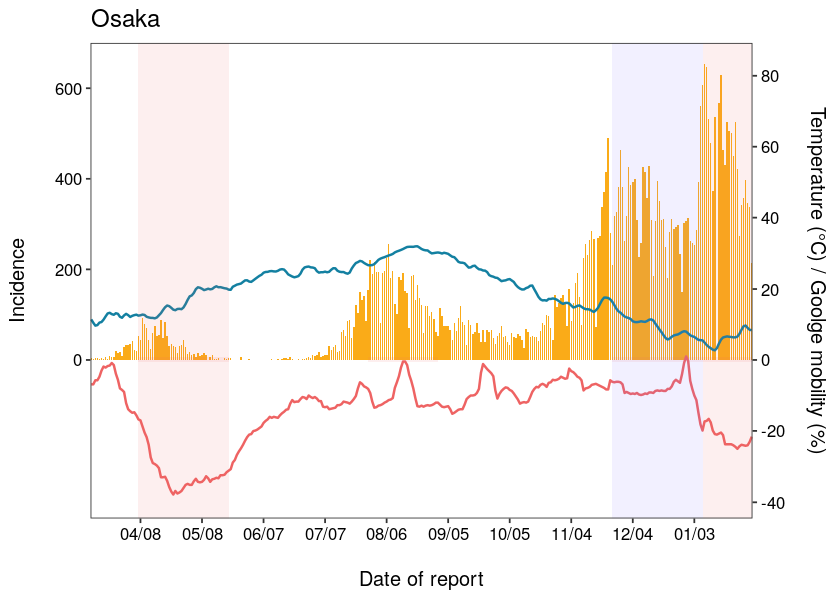

In [28]:
options(repr.plot.width=7,repr.plot.height=5)

final_data_MV %>% filter(prefecture==c("Osaka")) -> dt_Osaka_MV

adj=0.012
adj2=0.012
scaling_parameter=max(dt_Osaka_MV$reported)/max(dt_Osaka_MV$MVA_retail)

dt_Osaka_MV %>% 
ggplot() + 
geom_bar(aes(x=date, y=reported),fill=c("#FAAB18"), stat='identity', position ="identity", width=0.7) +
geom_line(aes(x=date,y=MVA_temp*adj*scaling_parameter),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=MVA_retail*adj2*scaling_parameter),color="indianred2",size=0.7) +
ggtitle("Osaka") +
labs(x="\nDate of report", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-28"), xmax = as.Date("2020-08-31"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-24"), xmax = Final_date, 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
scale_y_continuous(expand = c(0, 0), breaks=c(0, 200, 400, 600),
                   sec.axis = sec_axis(~./(scaling_parameter*adj),
                                       breaks=c(-60, -40, -20, 0, 20, 40, 60, 80, 100),
                                       name="Temperature (°C) / Goolge mobility (%)\n")) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -400, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-24"), xmax = as.Date("2021-01-07"), 
         ymin = -400, ymax = 1000, alpha = 0.1, fill = "lightslateblue") +
annotate("rect", xmin = as.Date("2021-01-07"), xmax = as.Date("2021-01-31"), 
         ymin = -400, ymax = 1000, alpha = 0.1, fill = "indianred2") +
coord_cartesian(ylim = c(-350,700))
ggsave("figure_Data_Osaka.png", width = 6, height = 4)

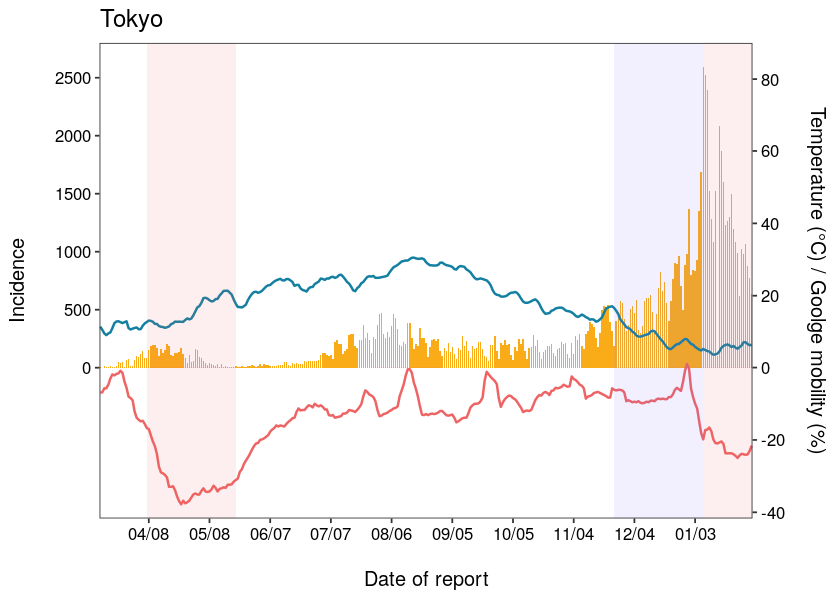

In [29]:
options(repr.plot.width=7,repr.plot.height=5)

final_data_MV %>% filter(prefecture==c("Tokyo")) -> dt_Tokyo_MV

adj=0.012
adj2=0.012
scaling_parameter=max(dt_Tokyo_MV$reported)/max(dt_Tokyo_MV$MVA_retail)

dt_Tokyo_MV %>% 
ggplot() + 
geom_bar(aes(x=date, y=reported),fill=c("#FAAB18"), stat='identity', position ="identity", width=0.7) +
geom_line(aes(x=date,y=MVA_temp*adj*scaling_parameter),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=MVA_retail*adj2*scaling_parameter),color="indianred2",size=0.7) +
ggtitle("Tokyo") +
labs(x="\nDate of report", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-28"), xmax = as.Date("2020-08-31"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-24"), xmax = Final_date, 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
scale_y_continuous(expand = c(0, 0), breaks=c(0, 500, 1000, 1500, 2000, 2500, 3000),
                   sec.axis = sec_axis(~./(scaling_parameter*adj),
                                       breaks=c(-60, -40, -20, 0, 20, 40, 60, 80, 100),
                                       name="Temperature (°C) / Goolge mobility (%)\n")) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -2000, ymax = 3000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-24"), xmax = as.Date("2021-01-07"), 
         ymin = -2000, ymax = 3000, alpha = 0.1, fill = "lightslateblue") +
annotate("rect", xmin = as.Date("2021-01-07"), xmax = as.Date("2021-01-31"), 
         ymin = -2000, ymax = 3000, alpha = 0.1, fill = "indianred2") +
coord_cartesian(ylim = c(-1300,2800))
ggsave("figure_Data_Tokyo.png", width = 6, height = 4)

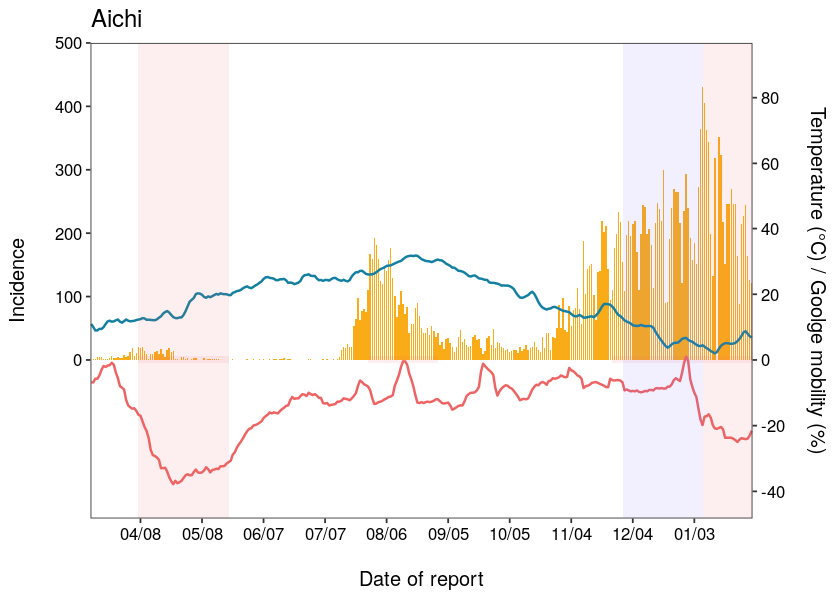

In [30]:
final_data_MV %>% filter(prefecture==c("Aichi")) -> dt_Aichi_MV

adj=0.012
adj2=0.012
scaling_parameter=max(dt_Aichi_MV$reported)/max(dt_Aichi_MV$MVA_retail)

dt_Aichi_MV %>% 
ggplot() + 
geom_bar(aes(x=date, y=reported),fill=c("#FAAB18"), stat='identity', position ="identity", width=0.7) +
geom_line(aes(x=date,y=MVA_temp*adj*scaling_parameter),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=MVA_retail*adj2*scaling_parameter),color="indianred2",size=0.7) +
ggtitle("Aichi") +
labs(x="\nDate of report", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-28"), xmax = as.Date("2020-08-31"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-24"), xmax = Final_date, 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
scale_y_continuous(expand = c(0, 0), breaks=c(0, 100, 200, 300, 400, 500),
                   sec.axis = sec_axis(~./(scaling_parameter*adj),
                                       breaks=c(-60, -40, -20, 0, 20, 40, 60, 80, 100),
                                       name="Temperature (°C) / Goolge mobility (%)\n")) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -250, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-29"), xmax = as.Date("2021-01-07"), 
         ymin = -250, ymax = 1000, alpha = 0.1, fill = "lightslateblue") +
annotate("rect", xmin = as.Date("2021-01-07"), xmax = as.Date("2021-01-31"), 
         ymin = -250, ymax = 2800, alpha = 0.1, fill = "indianred2") +
coord_cartesian(ylim = c(-250,500))
ggsave("figure_Data_Aichi.png", width = 6, height = 4)

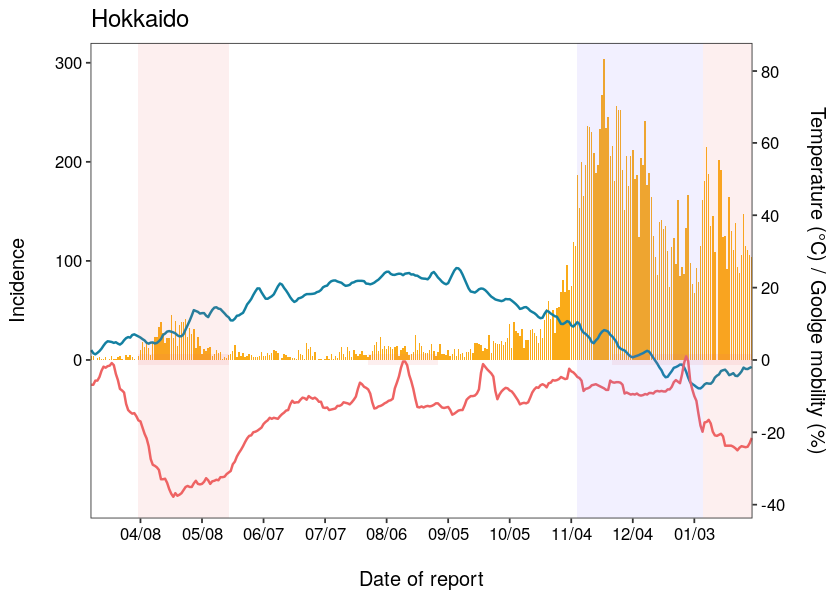

In [31]:
final_data_MV %>% filter(prefecture==c("Hokkaido")) -> dt_Hokkaido_MV

adj=0.012
adj2=0.012
scaling_parameter=max(dt_Hokkaido_MV$reported)/max(dt_Hokkaido_MV$MVA_retail)

dt_Hokkaido_MV %>% 
ggplot() + 
geom_bar(aes(x=date, y=reported),fill=c("#FAAB18"), stat='identity', position ="identity", width=0.7) +
geom_line(aes(x=date,y=MVA_temp*adj*scaling_parameter),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=MVA_retail*adj2*scaling_parameter),color="indianred2",size=0.7) +
ggtitle("Hokkaido") +
labs(x="\nDate of report", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-28"), xmax = as.Date("2020-08-31"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-24"), xmax = Final_date, 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
scale_y_continuous(expand = c(0, 0), breaks=c(0, 100, 200, 300, 400, 500),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), 
                                       breaks=c(-60, -40, -20, 0, 20, 40, 60, 80, 100),
                                       name="Temperature (°C) / Goolge mobility (%)\n")) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -160, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-07"), xmax = as.Date("2021-01-07"), 
         ymin = -160, ymax = 1000, alpha = 0.1, fill = "lightslateblue") +
annotate("rect", xmin = as.Date("2021-01-07"), xmax = as.Date("2021-01-31"), 
         ymin = -160, ymax = 2800, alpha = 0.1, fill = "indianred2") +
coord_cartesian(ylim = c(-160,320))
ggsave("figure_Data_Hokkaido.png", width = 6, height = 4)

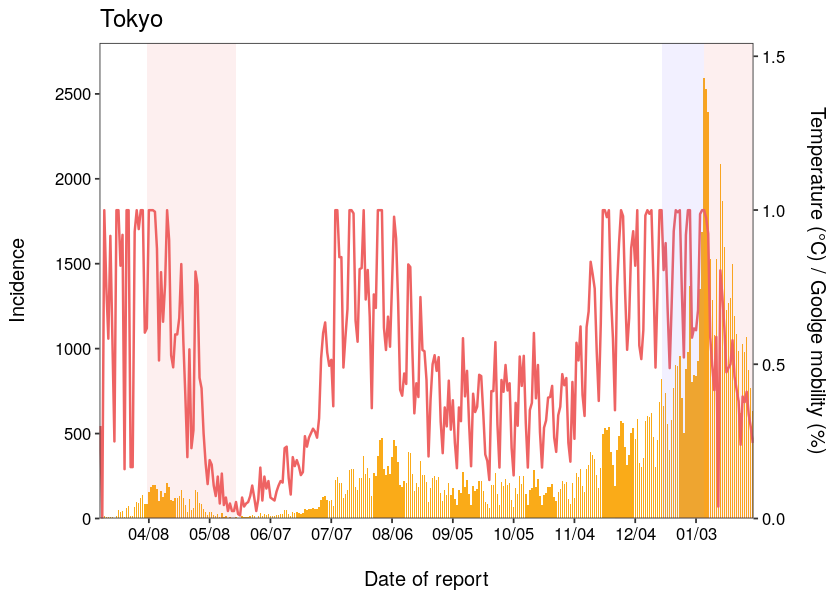

In [32]:
final_data_MV %>% filter(prefecture==c("Tokyo")) -> dt_Tokyo_MV

adj=0.7
scaling_parameter=max(dt_Tokyo_MV$reported)/max(dt_Tokyo_MV$rel_reported)

dt_Tokyo_MV %>% 
ggplot() + 
geom_bar(aes(x=date, y=reported),fill=c("#FAAB18"), stat='identity', position ="identity", width=0.7) +
geom_line(aes(x=date,y=rel_reported*adj*scaling_parameter),color="indianred2",size=0.7) +
ggtitle("Tokyo") +
labs(x="\nDate of report", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-28"), xmax = as.Date("2020-08-31"), 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-11-24"), xmax = Final_date, 
         ymin = -5, ymax = 6, alpha = 0.1, fill = "indianred2") +
scale_y_continuous(expand = c(0, 0), breaks=c(0, 500, 1000, 1500, 2000, 2500, 3000),
                   sec.axis = sec_axis(~./(scaling_parameter*adj),                                      
                                       name="Temperature (°C) / Goolge mobility (%)\n")) +
annotate("rect", xmin = as.Date("2020-04-07"), xmax = as.Date("2020-05-21"), 
         ymin = -1300, ymax = 2800, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-12-17"), xmax = as.Date("2021-01-07"), 
         ymin = -1300, ymax = 2800, alpha = 0.1, fill = "lightslateblue") +
annotate("rect", xmin = as.Date("2021-01-07"), xmax = as.Date("2021-01-31"), 
         ymin = -1300, ymax = 2800, alpha = 0.1, fill = "indianred2") +
coord_cartesian(ylim = c(0,2800))

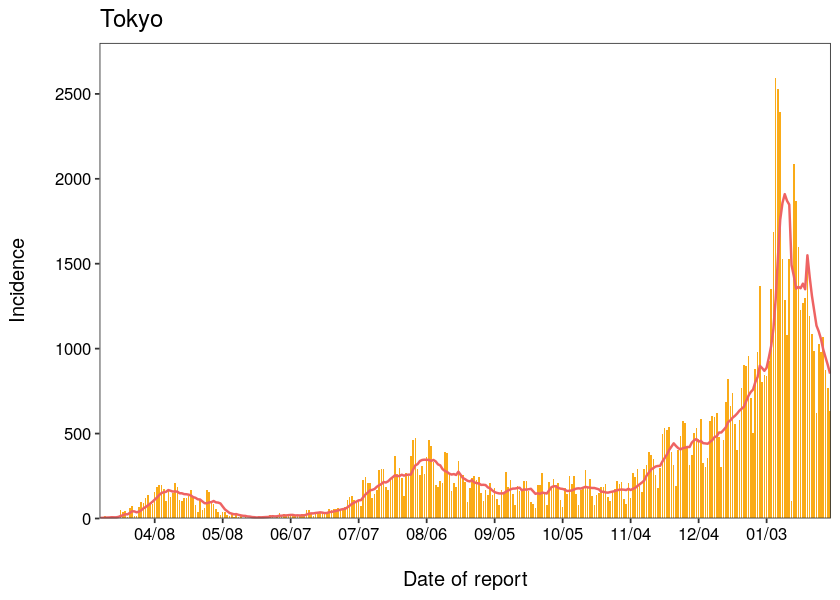

In [33]:
final_data_MV %>% filter(prefecture==c("Tokyo")) -> dt_Tokyo_MV


dt_Tokyo_MV %>% 
ggplot() + 
geom_bar(aes(x=date, y=reported),fill=c("#FAAB18"), stat='identity', position ="identity", width=0.7) +
geom_line(aes(x=date,y=MVA_reported),color="indianred2",size=0.7) +
ggtitle("Tokyo") +
labs(x="\nDate of report", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +

scale_y_continuous(expand = c(0, 0), breaks=c(0, 500, 1000, 1500, 2000, 2500, 3000)) +
coord_cartesian(ylim = c(0,2800))

# Model

## Estimated R in each prefectrue

In [34]:
## generation interval (Nishiura, et al, 2020)
gi_fit = list(shape=2.305, scale=5.452)
generation <- function(t){pweibull(t, shape = gi_fit$shape, scale = gi_fit$scale) - 
                          pweibull(t-1, shape = gi_fit$shape, scale = gi_fit$scale)}

In [35]:
fit_date <- as.Date("2020-09-01")

In [36]:
library("ConnMatTools")

In [37]:
likelihood <- function(params){
    
    llk_total <- rep(0, length(prefecture_name))
    
    for (g in 1:length(prefecture_name)){
        
        final_data_MV %>% filter(prefecture==prefecture_name[g]) %>% 
        filter(date < fit_date)%>% 
        mutate(total = imported_delay + domestic_delay) -> data_MV
        
        Cs <- rep(0, nrow(data_MV))
        llk <- rep(0, nrow(data_MV))
        
        for (t in 2:nrow(data_MV)){
            
            Css <- rep(0, t)
            
            for (tau in 1:(t-1)){
                Css[tau] = (data_MV$total[t-tau])*generation(tau)}
            
            Cs[t] = sum(Css)* params[4+g] *
            exp(params[3]*data_MV$MVA_retail[t] + 
                params[2]*data_MV$MVA_temp[t] + 
                params[4]*data_MV$MVA_reported[t]/100) 
            
            
            Cs[Cs<=0] <- 1e-5
#             llk[t] <- -(-Cs[t]+data_MV$domestic_delay[t]*log(Cs[t])-lgamma(data_MV$domestic_delay[t]+1))
            
            if (data_MV$date[t] > as.Date("2020-05-01") && data_MV$date[t]  < as.Date("2020-07-15")) {llk[t]=0}
            else{llk[t] <- -(-Cs[t]+data_MV$domestic_delay[t]*log(Cs[t])-lgamma(data_MV$domestic_delay[t]+1))}
        }
        
        sum(llk) -> llk_total[g] 
    }
    
    gam_par <- gammaParamsConvert(mean=params[1], sd=0.5*params[1])
    prior_dist = -dgamma(params[4+g], shape=gam_par$shape, scale=gam_par$scale, log=T)
    
    return(sum(llk_total)+(prior_dist))
}

param0 = c(2.5, -0.02, 0.03, -0.16, 2.5, 2.9, 2.3, 2.4)

options(warn=-1)
opt_est_back <- optim(param0, fn=likelihood, method=c("L-BFGS-B"),
                      lower=c(0, -Inf, 0, -Inf, rep(0,length(prefecture_name))),
                      upper=c(Inf, 0, Inf, 0, rep(Inf,length(prefecture_name))),
                      control=list(maxit=100000), hessian=TRUE)
options(warn=0)

opt_est_back

0.5874358,0.000,0.000,0.0000,0.000,0.000,0.000000e+00,-6.399976e-01
0.0000000,17356856.214,-7122918.937,1175897.3092,79976.367,126171.203,4.900177e+04,7.273593e+03
0.0000000,-7122918.937,5697989.067,-500496.4751,-33952.639,-69681.343,-1.848874e+04,-9.896422e+03
0.0000000,1175897.309,-500496.475,101787.0111,3455.566,12065.097,1.373608e+03,6.761280e+01
0.0000000,79976.367,-33952.639,3455.5658,1293.643,0.000,0.000000e+00,0.000000e+00
0.0000000,126171.203,-69681.343,12065.0968,0.000,2023.232,0.000000e+00,0.000000e+00
0.0000000,49001.771,-18488.741,1373.6081,0.000,0.000,8.195907e+02,1.136868e-07
-0.6399976,7273.593,-9896.422,67.6128,0.000,0.000,1.136868e-07,2.254465e+02


In [38]:
saveRDS(opt_est_back$par, "model3_par_gamma.rds")
saveRDS(opt_est_back$hessian, "model3_hes_gamma.rds")

# 95% of confidence Intervals

In [39]:
niter=10000

In [40]:
library(MASS)

hes <- opt_est_back$hessian
fisher_info<-solve(hes)
par <- opt_est_back$par

# readRDS("model3_hes.rds") -> hes
# fisher_info<-solve(hes)
# readRDS("model3_par.rds") -> par


hess_same <- mvrnorm(n=niter, mu=par, Sigma=fisher_info, tol=1e-25, empirical =FALSE, EISPACK =FALSE)

c(quantile(hess_same[,2], .025, na.rm = FALSE), 
  quantile(hess_same[,2], .5, na.rm = FALSE),
  quantile(hess_same[,2], .975, na.rm = FALSE))

c(quantile(hess_same[,3], .025, na.rm = FALSE), 
  quantile(hess_same[,3], .5, na.rm = FALSE),
  quantile(hess_same[,3], .975, na.rm = FALSE))

c(quantile(hess_same[,4], .025, na.rm = FALSE), 
  quantile(hess_same[,4], .5, na.rm = FALSE),
  quantile(hess_same[,4], .975, na.rm = FALSE))

c(quantile(hess_same[,5], .025, na.rm = FALSE), 
  quantile(hess_same[,5], .5, na.rm = FALSE),
  quantile(hess_same[,5], .975, na.rm = FALSE))

c(quantile(hess_same[,6], .025, na.rm = FALSE), 
  quantile(hess_same[,6], .5, na.rm = FALSE),
  quantile(hess_same[,6], .975, na.rm = FALSE))

c(quantile(hess_same[,7], .025, na.rm = FALSE), 
  quantile(hess_same[,7], .5, na.rm = FALSE),
  quantile(hess_same[,7], .975, na.rm = FALSE))

c(quantile(hess_same[,8], .025, na.rm = FALSE), 
  quantile(hess_same[,8], .5, na.rm = FALSE),
  quantile(hess_same[,8], .975, na.rm = FALSE))

2.5%         50%       97.5% 
-0.02059217 -0.01736095 -0.01412843

2.5%        50%      97.5% 
0.02814432 0.03002197 0.03193688

2.5%        50%      97.5% 
-0.1696935 -0.1453172 -0.1199897

2.5%      50%    97.5% 
2.275096 2.466831 2.660880

2.5%      50%    97.5% 
2.674051 2.843565 3.015607

2.5%      50%    97.5% 
2.079248 2.279589 2.480229

2.5%      50%    97.5% 
2.189520 2.396418 2.609770

# Upper boundary for the reported cases

In [41]:
Density %>% filter(prefecture==c("Tokyo")) %>% dplyr::select(popsize) %>% as.numeric() -> pop_Tokyo
Density %>% filter(prefecture==c("Osaka")) %>% dplyr::select(popsize) %>% as.numeric() -> pop_Osaka
Density %>% filter(prefecture==c("Aichi")) %>% dplyr::select(popsize) %>% as.numeric() -> pop_Aichi
Density %>% filter(prefecture==c("Hokkaido")) %>% dplyr::select(popsize) %>% as.numeric() -> pop_Hokkaido

(upper_Tokyo <- round(pop_Tokyo*1000/100000*25/7))
(upper_Osaka <- round(pop_Osaka*1000/100000*25/7))
(upper_Aichi <- round(pop_Aichi*1000/100000*25/7))
(upper_Hokkaido <- round(pop_Hokkaido*1000/100000*25/7))

(upper_Tokyo <- 500)
(upper_Osaka <- round(500/pop_Tokyo*pop_Osaka))
(upper_Aichi <- round(500/pop_Tokyo*pop_Aichi))
(upper_Hokkaido <- round(500/pop_Tokyo*pop_Hokkaido))

# upper_Tokyo <- 500

final_data_MV %<>% 
mutate(MVA_reported_upper = 
       case_when(prefecture==c("Tokyo") & (MVA_reported >= upper_Tokyo) ~ as.numeric(upper_Tokyo),
                 prefecture==c("Osaka") & (MVA_reported >= upper_Osaka) ~ as.numeric(upper_Osaka),
                 prefecture==c("Aichi") & (MVA_reported >= upper_Aichi) ~ as.numeric(upper_Aichi),
                 prefecture==c("Hokkaido") & (MVA_reported >= upper_Hokkaido) ~ as.numeric(upper_Hokkaido),
                 TRUE ~ as.numeric(MVA_reported)))

[1] 497

[1] 315

[1] 270

[1] 188

[1] 500

[1] 316

[1] 271

[1] 189

# Checking results

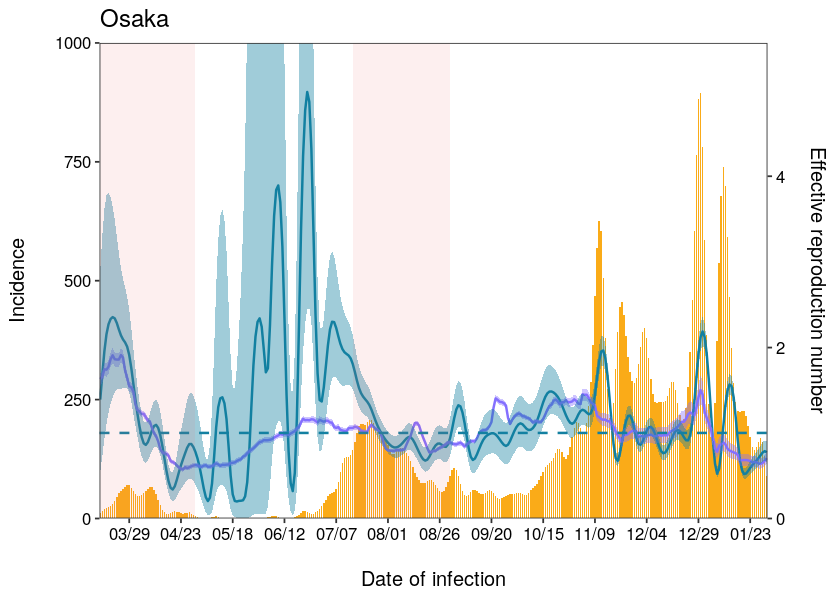

In [42]:
final_data_MV %>% filter(prefecture==c("Osaka")) -> tempformatrix

R_CI <- matrix(NA, ncol=niter, nrow=nrow(tempformatrix))
CIs <- matrix(NA, ncol=3, nrow=nrow(tempformatrix))


## Final result for Osaka
for (k in 1:niter){
final_data_MV %>% filter(prefecture==c("Osaka")) %>%

mutate(modelled_back = 
#        hess_same[k, 1] * 
       hess_same[k, 5] * 
       exp(hess_same[k, 2]*MVA_temp + 
           hess_same[k, 3]*MVA_retail +
           hess_same[k, 4]*MVA_reported_upper/100)) -> temp
    
    for(q in 1:nrow(temp)){temp$modelled_back[q] -> R_CI[q,k]}
}

for(w in 1:nrow(temp)){
    quantile(R_CI[w,], .025, na.rm = FALSE) -> CIs[w,1] 
    quantile(R_CI[w,], .5, na.rm = FALSE) -> CIs[w,2] 
    quantile(R_CI[w,], .975, na.rm = FALSE) -> CIs[w,3] 
}

CIs %<>% as.data.frame
colnames(CIs) <- c("lower", "median", "upper")

## Renewal equation
temp %>% dplyr::select(date) -> tempp

cbind(tempp, CIs) -> Rt_data
read_data[[1]] %>% filter(date >= new_Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> temppp

merge(temppp, temp, by=c("date")) -> Rt_CI
merge(Rt_CI, Rt_data, by=c("date")) -> figure_data
figure_data -> figure_data_CI_Osaka

options(repr.plot.width=7,repr.plot.height=5)

adj=0.4
scaling_parameter=max(figure_data$total)/max(figure_data$upper[!is.na(figure_data$upper)])


figure_data %>%
ggplot() + 
geom_bar(aes(x=date, y=total),fill="#FAAB18", stat='identity', width=0.7) +
geom_line(aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=median*scaling_parameter*adj),color="lightslateblue",size=0.7) +
geom_ribbon(aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +

ggtitle("Osaka") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="25 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

# annotate("rect", xmin = new_Start_date, xmax = fit_date, 
#          ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10), 
                                       name="Effective reproduction number\n")) +

# geom_vline(xintercept=as.Date("2020-05-01"), linetype="dashed", color = "#1380A1", size =0.7) +

coord_cartesian(ylim = c(0,1000))

ggsave("figure_Osaka_retail_CIs_gamma.png", width = 6, height = 4)

In [43]:
Norms <- matrix(NA, ncol=2, nrow=nrow(tempformatrix))

for (k in 1:nrow(temp)){
    fit <- fitdistr(R_CI[k,], "normal")
    as.numeric(fit$estimate[1]) -> Norms[k,1]
    as.numeric(fit$estimate[2]) -> Norms[k,2]
}

Norms %>% as.data.frame -> Norm_Osaka
colnames(Norm_Osaka) <- c("mean", "sd")

temp %>% dplyr::select(date) -> tempp
cbind(tempp, Norm_Osaka) -> Norm_Osaka
Norm_Osaka %<>% filter(date >= as.Date("2020-09-01")) %>% filter(date <= Final_date)

saveRDS(Norm_Osaka, "Norm_Osaka_3_gamma.rds")

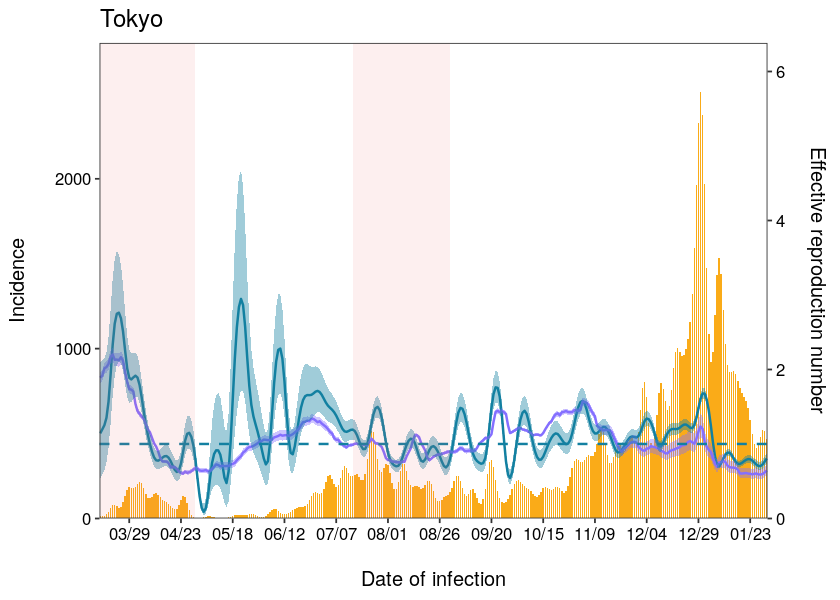

In [44]:
R_CI <- matrix(NA, ncol=niter, nrow=nrow(tempformatrix))
CIs <- matrix(NA, ncol=3, nrow=nrow(tempformatrix))


## Final result for Osaka
for (k in 1:niter){
final_data_MV %>% filter(prefecture==c("Tokyo")) %>%

mutate(modelled_back = 
       hess_same[k, 6] * 
       #        hess_same[k, 1] * 
       exp(hess_same[k, 2]*MVA_temp + 
           hess_same[k, 3]*MVA_retail +
           hess_same[k, 4]*MVA_reported_upper/100)) -> temp
    
    for(q in 1:nrow(temp)){temp$modelled_back[q] -> R_CI[q,k]}
}

for(w in 1:nrow(temp)){
    quantile(R_CI[w,], .025, na.rm = FALSE) -> CIs[w,1] 
    quantile(R_CI[w,], .5, na.rm = FALSE) -> CIs[w,2] 
    quantile(R_CI[w,], .975, na.rm = FALSE) -> CIs[w,3] 
}

CIs %<>% as.data.frame
colnames(CIs) <- c("lower", "median", "upper")

## Renewal equation
temp %>% dplyr::select(date) -> tempp

cbind(tempp, CIs) -> Rt_data
read_data[[2]] %>% filter(date >= new_Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> temppp

merge(temppp, temp, by=c("date")) -> Rt_CI
merge(Rt_CI, Rt_data, by=c("date")) -> figure_data
figure_data -> figure_data_CI_Tokyo

options(repr.plot.width=7,repr.plot.height=5)

adj=0.4
scaling_parameter=max(figure_data$total)/max(figure_data$upper[!is.na(figure_data$upper)])


figure_data %>%
ggplot() + 
geom_bar(aes(x=date, y=total),fill="#FAAB18", stat='identity', width=0.7) +
geom_line(aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=median*scaling_parameter*adj),color="lightslateblue",size=0.7) +
geom_ribbon(aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +

ggtitle("Tokyo") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="25 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

# annotate("rect", xmin = new_Start_date, xmax = fit_date, 
#          ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 5000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 5000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10,12,14,16,18), 
                                       name="Effective reproduction number\n")) +

# geom_vline(xintercept=as.Date("2020-05-01"), linetype="dashed", color = "#1380A1", size =0.7) +

coord_cartesian(ylim = c(0,2800))

ggsave("figure_Tokyo_retail_CIs_gamma.png", width = 6, height = 4)

In [45]:
Norms <- matrix(NA, ncol=2, nrow=nrow(tempformatrix))

for (k in 1:nrow(temp)){
    fit <- fitdistr(R_CI[k,], "normal")
    as.numeric(fit$estimate[1]) -> Norms[k,1]
    as.numeric(fit$estimate[2]) -> Norms[k,2]
}

Norms %>% as.data.frame -> Norm_Tokyo
colnames(Norm_Tokyo) <- c("mean", "sd")

temp %>% dplyr::select(date) -> tempp
cbind(tempp, Norm_Tokyo) -> Norm_Tokyo
Norm_Tokyo %<>% filter(date >= as.Date("2020-09-01")) %>% filter(date <= Final_date)

saveRDS(Norm_Tokyo, "Norm_Tokyo_3_gamma.rds")

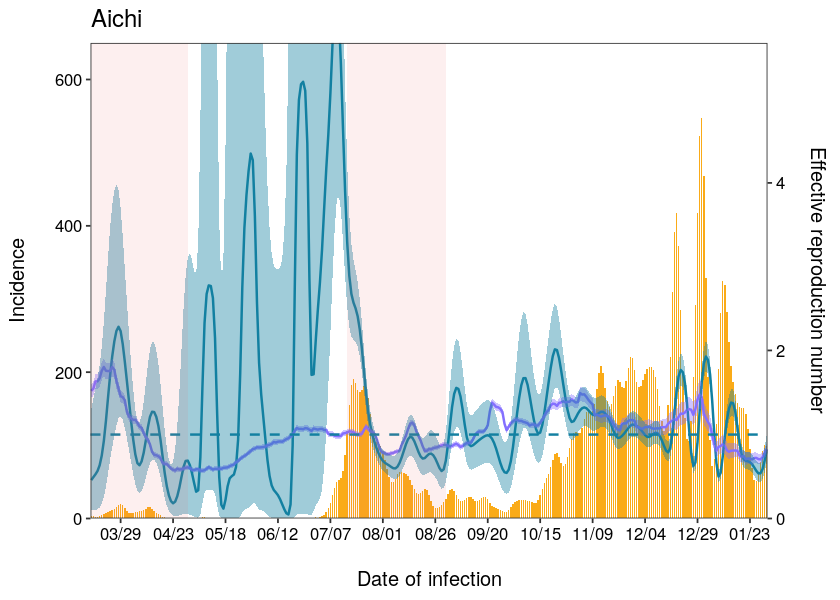

In [46]:
R_CI <- matrix(NA, ncol=niter, nrow=nrow(tempformatrix))
CIs <- matrix(NA, ncol=3, nrow=nrow(tempformatrix))


## Final result for Osaka
for (k in 1:niter){
final_data_MV %>% filter(prefecture==c("Aichi")) %>%

mutate(modelled_back = 
       hess_same[k, 7] * 
       #        hess_same[k, 1] * 
       exp(hess_same[k, 2]*MVA_temp + 
           hess_same[k, 3]*MVA_retail +
           hess_same[k, 4]*MVA_reported_upper/100)) -> temp
    
    for(q in 1:nrow(temp)){temp$modelled_back[q] -> R_CI[q,k]}
}

for(w in 1:nrow(temp)){
    quantile(R_CI[w,], .025, na.rm = FALSE) -> CIs[w,1] 
    quantile(R_CI[w,], .5, na.rm = FALSE) -> CIs[w,2] 
    quantile(R_CI[w,], .975, na.rm = FALSE) -> CIs[w,3] 
}

CIs %<>% as.data.frame
colnames(CIs) <- c("lower", "median", "upper")

## Renewal equation
temp %>% dplyr::select(date) -> tempp

cbind(tempp, CIs) -> Rt_data
read_data[[3]] %>% filter(date >= new_Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> temppp

merge(temppp, temp, by=c("date")) -> Rt_CI
merge(Rt_CI, Rt_data, by=c("date")) -> figure_data
figure_data -> figure_data_CI_Aichi

options(repr.plot.width=7,repr.plot.height=5)

adj=0.4
scaling_parameter=max(figure_data$total)/max(figure_data$upper[!is.na(figure_data$upper)])


figure_data %>%
ggplot() + 
geom_bar(aes(x=date, y=total),fill="#FAAB18", stat='identity', width=0.7) +
geom_line(aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=median*scaling_parameter*adj),color="lightslateblue",size=0.7) +
geom_ribbon(aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +

ggtitle("Aichi") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="25 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

# annotate("rect", xmin = new_Start_date, xmax = fit_date, 
#          ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10,12,14,16,18), 
                                       name="Effective reproduction number\n")) +

# geom_vline(xintercept=as.Date("2020-05-01"), linetype="dashed", color = "#1380A1", size =0.7) +

coord_cartesian(ylim = c(0,650))

ggsave("figure_Aichi_retail_CIs_gamma.png", width = 6, height = 4)

In [55]:
Norms <- matrix(NA, ncol=2, nrow=nrow(tempformatrix))

for (k in 1:nrow(temp)){
    fit <- fitdistr(R_CI[k,], "normal")
    as.numeric(fit$estimate[1]) -> Norms[k,1]
    as.numeric(fit$estimate[2]) -> Norms[k,2]
}

Norms %>% as.data.frame -> Norm_Aichi
colnames(Norm_Aichi) <- c("mean", "sd")

temp %>% dplyr::select(date) -> tempp
cbind(tempp, Norm_Aichi) -> Norm_Aichi
Norm_Aichi %<>% filter(date >= as.Date("2020-09-01")) %>% filter(date <= Final_date)

saveRDS(Norm_Aichi, "Norm_Aichi_3_gamma.rds")

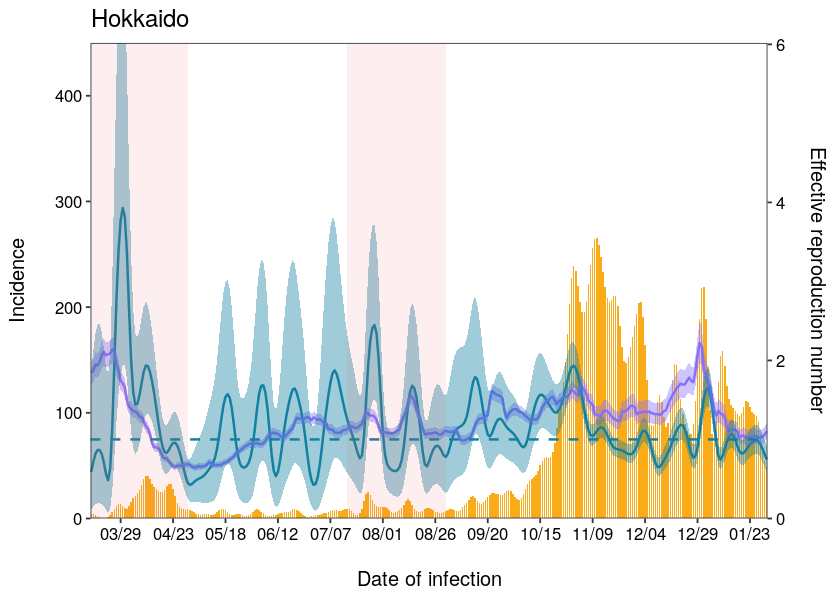

In [48]:
R_CI <- matrix(NA, ncol=niter, nrow=nrow(tempformatrix))
CIs <- matrix(NA, ncol=3, nrow=nrow(tempformatrix))


## Final result for Osaka
for (k in 1:niter){
final_data_MV %>% filter(prefecture==c("Hokkaido")) %>%

mutate(modelled_back = 
       hess_same[k, 8] * 
       exp(hess_same[k, 2]*MVA_temp + 
           hess_same[k, 3]*MVA_retail +
           hess_same[k, 4]*MVA_reported_upper/100)) -> temp
    
    for(q in 1:nrow(temp)){temp$modelled_back[q] -> R_CI[q,k]}
}

for(w in 1:nrow(temp)){
    quantile(R_CI[w,], .025, na.rm = FALSE) -> CIs[w,1] 
    quantile(R_CI[w,], .5, na.rm = FALSE) -> CIs[w,2] 
    quantile(R_CI[w,], .975, na.rm = FALSE) -> CIs[w,3] 
}

CIs %<>% as.data.frame
colnames(CIs) <- c("lower", "median", "upper")

## Renewal equation
temp %>% dplyr::select(date) -> tempp

cbind(tempp, CIs) -> Rt_data
read_data[[4]] %>% filter(date >= new_Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> temppp

merge(temppp, temp, by=c("date")) -> Rt_CI
merge(Rt_CI, Rt_data, by=c("date")) -> figure_data
figure_data -> figure_data_CI_Hokkaido

options(repr.plot.width=7,repr.plot.height=5)

adj=0.7
scaling_parameter=max(figure_data$total)/max(figure_data$upper[!is.na(figure_data$upper)])


figure_data %>%
ggplot() + 
geom_bar(aes(x=date, y=total),fill="#FAAB18", stat='identity', width=0.7) +
geom_line(aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(aes(x=date,y=median*scaling_parameter*adj),color="lightslateblue",size=0.7) +
geom_ribbon(aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +

ggtitle("Hokkaido") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="25 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

# annotate("rect", xmin = new_Start_date, xmax = fit_date, 
#          ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10,12,14,16,18), 
                                       name="Effective reproduction number\n")) +

# geom_vline(xintercept=as.Date("2020-05-01"), linetype="dashed", color = "#1380A1", size =0.7) +

coord_cartesian(ylim = c(0,450))

ggsave("figure_Hokkaido_retail_CIs_gamma.png", width = 6, height = 4)

In [49]:
Norms <- matrix(NA, ncol=2, nrow=nrow(tempformatrix))

for (k in 1:nrow(tempformatrix)){
    fit <- fitdistr(R_CI[k,], "normal")
    as.numeric(fit$estimate[1]) -> Norms[k,1]
    as.numeric(fit$estimate[2]) -> Norms[k,2]
}

Norms %>% as.data.frame -> Norm_Hokkaido
colnames(Norm_Hokkaido) <- c("mean", "sd")

temp %>% dplyr::select(date) -> tempp
cbind(tempp, Norm_Hokkaido) -> Norm_Hokkaido
Norm_Hokkaido %<>% filter(date >= as.Date("2020-09-01")) %>% filter(date <= Final_date)

saveRDS(Norm_Hokkaido, "Norm_Hokkaido_3_gamma.rds")

# Coverage

In [50]:
read_data <- list()

for (i in 1:length(scr_files)){
  assign(paste0("Rt_", prefecture_name[i]), 
         read.csv(paste0(src_dir, "/", scr_files[i])) %>% mutate(prefecture = prefecture_name[i]) %>%
         dplyr::select(prefecture, onset, imported_delay, domestic_delay, Rt, lower, upper) %>% rename(date = onset) %>%
         filter(date <= Final_date) %>% filter(!is.na(Rt)) %>% mutate(total = imported_delay+domestic_delay) %>%
         mutate(date = as.Date(date))) -> read_data[[i]]}

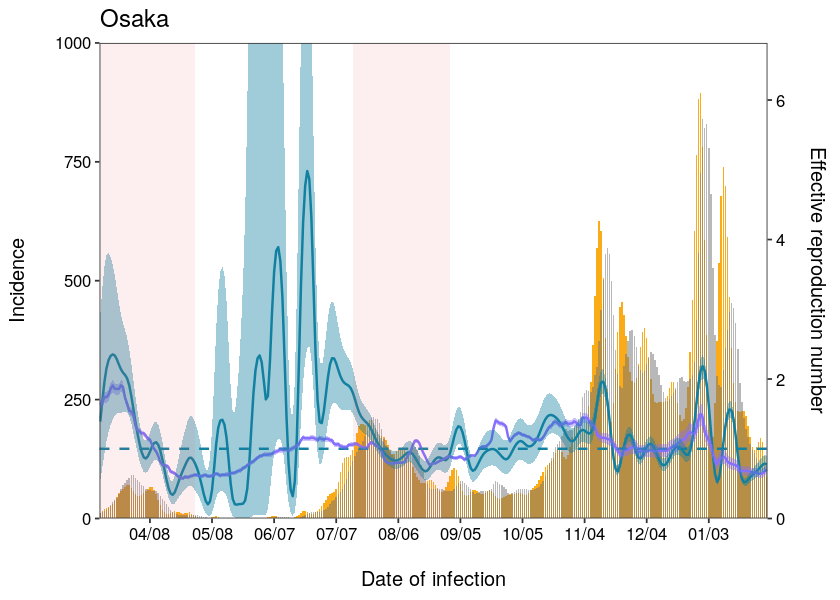

In [51]:
## Final result for Osaka
final_data_MV %>% filter(prefecture==c("Osaka")) %>%

mutate(modelled_back = 
#        opt_est_back$par[1] * 
       opt_est_back$par[5] * 
       exp(opt_est_back$par[2]*MVA_temp + 
           opt_est_back$par[3]*MVA_retail + 
           opt_est_back$par[4]*MVA_reported_upper/100)) -> dt_Osaka_MV


## Renewal equation
dt_Osaka_MV %>% dplyr::select(date, modelled_back) -> Rt_data
merge(read_data[[1]], Rt_data, by=c("date"), all.x=TRUE) -> percent
percent %<>% mutate(total = domestic_delay + imported_delay) 

Cs <- rep(0, nrow(percent))

start = which(percent$date == new_Start_date)

for (t in start:nrow(percent)){
    
    Css <- rep(0, t)    
    for (tau in 1:t-1){Css[tau] = (percent$total[t-tau+1])*generation(tau)}
    
    Cs[t] = sum(Css)*percent$modelled_back[t]+percent$imported_delay[t]
}  

as.data.frame(Cs[start:nrow(percent)]) -> modelled
colnames(modelled) <- c("modelled_case")
cbind(dt_Osaka_MV,modelled) -> dt_Osaka_MV


## Figure for Osaka
dt_Osaka_MV %<>% filter(date >= Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> figure_data


figure_data %>% dplyr::select(total, modelled_case) %>% gather(date) -> bar_data
figure_data %>% dplyr::select(date) -> TIME
rbind(TIME, TIME) -> TIME
cbind(bar_data, TIME) -> bar_data
colnames(bar_data) <- c("subject","value","date")


options(repr.plot.width=7,repr.plot.height=5)

adj=1.3
scaling_parameter=max(figure_data$total)/max(figure_data$Rt[!is.na(figure_data$Rt)])


bar_data %>%
ggplot() + 
geom_bar(aes(x=date, y=value, fill=subject, group=subject),stat='identity', position ="identity", width=0.7) +

scale_fill_manual(values=c(alpha("grey45", 0.5),alpha("#FAAB18", 1))) +
geom_line(data=figure_data,aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(data=figure_data,aes(x=date,y=modelled_back*scaling_parameter*adj),color="lightslateblue",size=0.7) +

ggtitle("Osaka") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

geom_ribbon(data=figure_data_CI_Osaka, aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(data=figure_data_CI_Osaka, aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10), 
                                       name="Effective reproduction number\n")) +

# geom_vline(xintercept=as.Date("2020-05-01"), linetype="dashed", color = "#1380A1", size =0.7) +

coord_cartesian(ylim = c(0,1000))

ggsave("figure_Osaka_retail_EXACT_percentage_gamma.png", width = 6, height = 4)

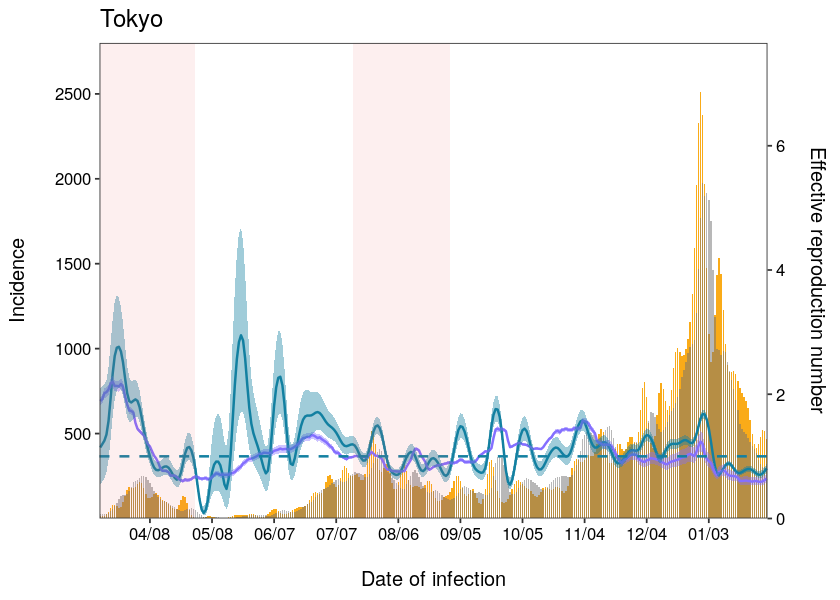

In [52]:
## Final result for Tokyo
final_data_MV %>% filter(prefecture==c("Tokyo")) %>%

mutate(modelled_back = 
       #        opt_est_back$par[1] * 
       opt_est_back$par[6] * 
       exp(opt_est_back$par[2]*MVA_temp + 
           opt_est_back$par[3]*MVA_retail +
           opt_est_back$par[4]*MVA_reported_upper/100)) -> dt_Tokyo_MV



## Renewal equation
dt_Tokyo_MV %>% dplyr::select(date, modelled_back) -> Rt_data
merge(read_data[[2]], Rt_data, by=c("date"), all.x=TRUE) -> percent

Cs <- rep(0, nrow(percent))

for (t in start:nrow(percent)){
    
    Css <- rep(0, t)    
    for (tau in 1:t-1){Css[tau] = (percent$total[t-tau+1])*generation(tau)}
    
    Cs[t] = sum(Css)*percent$modelled_back[t]+percent$imported_delay[t]
}  

as.data.frame(Cs[start:nrow(percent)]) -> modelled
colnames(modelled) <- c("modelled_case")
cbind(dt_Tokyo_MV ,modelled) -> dt_Tokyo_MV 


## Figure for Osaka
dt_Tokyo_MV  %<>% filter(date >= Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> figure_data


figure_data %>% dplyr::select(total, modelled_case) %>% gather(date) -> bar_data
figure_data %>% dplyr::select(date) -> TIME
rbind(TIME, TIME) -> TIME
cbind(bar_data, TIME) -> bar_data
colnames(bar_data) <- c("subject","value","date")


options(repr.plot.width=7,repr.plot.height=5)

adj=0.6
scaling_parameter=max(figure_data$total)/max(figure_data$Rt[!is.na(figure_data$Rt)])


bar_data %>%
ggplot() + 
geom_bar(aes(x=date, y=value, fill=subject, group=subject),stat='identity', position ="identity", width=0.7) +
scale_fill_manual(values=c(alpha("grey45", 0.5),alpha("#FAAB18", 1))) +
geom_line(data=figure_data,aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(data=figure_data,aes(x=date,y=modelled_back*scaling_parameter*adj),color="lightslateblue",size=0.7) +

geom_ribbon(data=figure_data_CI_Tokyo, aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(data=figure_data_CI_Tokyo, aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +


ggtitle("Tokyo") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 3000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 3000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0), breaks=c(500, 1000, 1500, 2000, 2500),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10,12,14,16,18), 
                                       name="Effective reproduction number\n")) +

# geom_vline(xintercept=as.Date("2020-05-01"), linetype="dashed", color = "#1380A1", size =0.7) +

coord_cartesian(ylim = c(0,2800))

ggsave("figure_Tokyo_retail_EXACT_percentage_gamma.png", width = 6, height = 4)

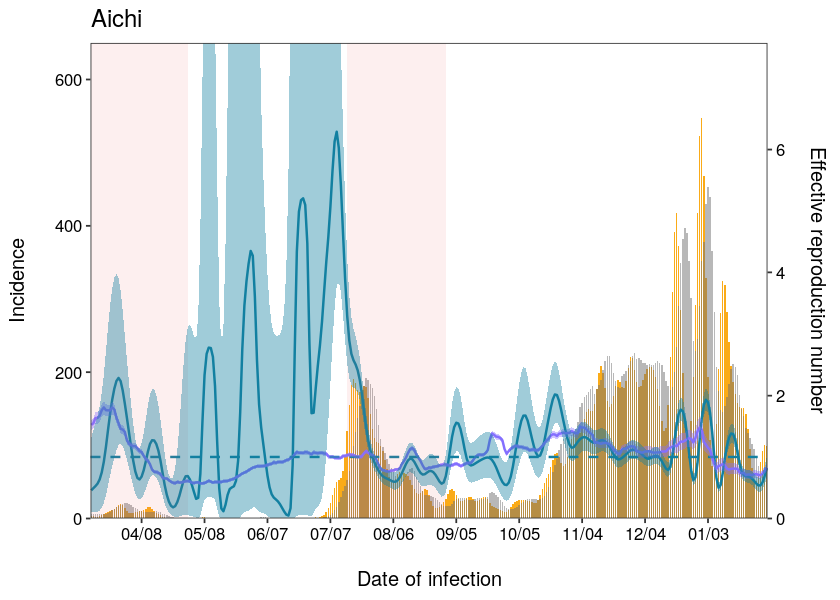

In [53]:
## Final result for Aichi
final_data_MV %>% filter(prefecture==c("Aichi")) %>%

mutate(modelled_back = 
       opt_est_back$par[7] * 
       #        opt_est_back$par[1] * 
       exp(opt_est_back$par[2]*MVA_temp + 
           opt_est_back$par[3]*MVA_retail +
           opt_est_back$par[4]*MVA_reported_upper/100)) -> dt_Aichi_MV



## Renewal equation
dt_Aichi_MV %>% dplyr::select(date, modelled_back) -> Rt_data
merge(read_data[[3]], Rt_data, by=c("date"), all.x=TRUE) -> percent

Cs <- rep(0, nrow(percent))

for (t in start:nrow(percent)){
    
    Css <- rep(0, t)    
    for (tau in 1:t-1){Css[tau] = (percent$total[t-tau+1])*generation(tau)}
    
    Cs[t] = sum(Css)*percent$modelled_back[t]+percent$imported_delay[t]
}  

as.data.frame(Cs[start:nrow(percent)]) -> modelled
colnames(modelled) <- c("modelled_case")
cbind(dt_Aichi_MV, modelled) -> dt_Aichi_MV


## Figure for Osaka
dt_Aichi_MV  %<>% filter(date >= Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> figure_data


figure_data %>% dplyr::select(total, modelled_case) %>% gather(date) -> bar_data
figure_data %>% dplyr::select(date) -> TIME
rbind(TIME, TIME) -> TIME
cbind(bar_data, TIME) -> bar_data
colnames(bar_data) <- c("subject","value","date")


options(repr.plot.width=7,repr.plot.height=5)

adj=2
scaling_parameter=max(figure_data$total)/max(figure_data$Rt[!is.na(figure_data$Rt)])


bar_data %>%
ggplot() + 
geom_bar(aes(x=date, y=value, fill=subject, group=subject),stat='identity', position ="identity", width=0.7) +
scale_fill_manual(values=c(alpha("grey45", 0.5),alpha("#FAAB18", 1))) +
geom_line(data=figure_data,aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(data=figure_data,aes(x=date,y=modelled_back*scaling_parameter*adj),color="lightslateblue",size=0.7) +
ggtitle("Aichi") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10,12,14,16,18), 
                                       name="Effective reproduction number\n")) +

geom_ribbon(data=figure_data_CI_Aichi, aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(data=figure_data_CI_Aichi, aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +

coord_cartesian(ylim = c(0,650))

ggsave("figure_Aichi_retail_EXACT_percentage_gamma.png", width = 6, height = 4)

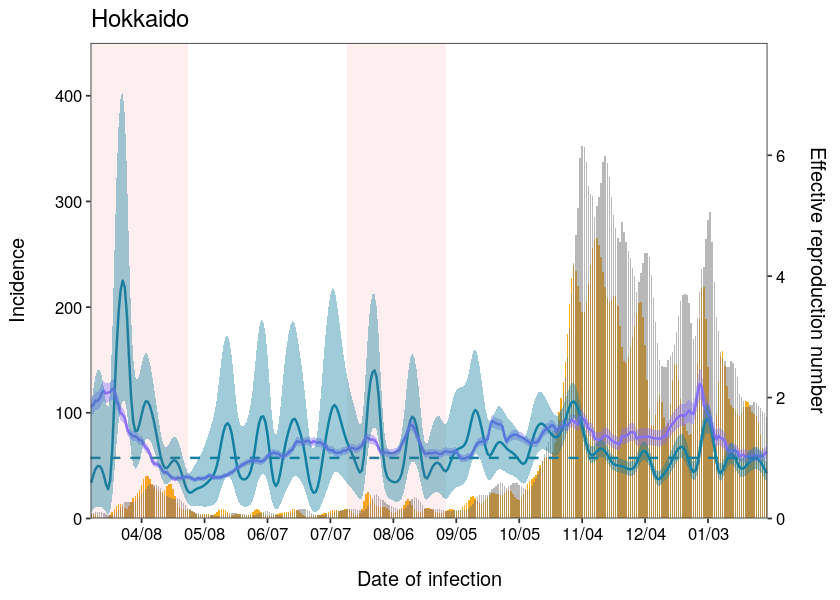

In [54]:
## Final result for Aichi
final_data_MV %>% filter(prefecture==c("Hokkaido")) %>%

mutate(modelled_back =
       #        opt_est_back$par[1] * 
       opt_est_back$par[8] * 
       exp(opt_est_back$par[2]*MVA_temp + 
           opt_est_back$par[3]*MVA_retail +
           opt_est_back$par[4]*MVA_reported_upper/100)) -> dt_Hokkaido_MV


## Renewal equation
dt_Hokkaido_MV %>% dplyr::select(date, modelled_back) -> Rt_data
merge(read_data[[4]], Rt_data, by=c("date"), all.x=TRUE) -> percent

Cs <- rep(0, nrow(percent))

for (t in start:nrow(percent)){
    
    Css <- rep(0, t)    
    for (tau in 1:t-1){Css[tau] = (percent$total[t-tau+1])*generation(tau)}
    
    Cs[t] = sum(Css)*percent$modelled_back[t]+percent$imported_delay[t]
}  

as.data.frame(Cs[start:nrow(percent)]) -> modelled
colnames(modelled) <- c("modelled_case")
cbind(dt_Hokkaido_MV, modelled) -> dt_Hokkaido_MV


## Figure for Osaka
dt_Hokkaido_MV  %<>% filter(date >= Start_date) %>% filter(date <= Final_date) %>% 
mutate(total = domestic_delay + imported_delay) -> figure_data


figure_data %>% dplyr::select(total, modelled_case) %>% gather(date) -> bar_data
figure_data %>% dplyr::select(date) -> TIME
rbind(TIME, TIME) -> TIME
cbind(bar_data, TIME) -> bar_data
colnames(bar_data) <- c("subject","value","date")


options(repr.plot.width=7,repr.plot.height=5)

adj=1.3
scaling_parameter=max(figure_data$total)/max(figure_data$Rt[!is.na(figure_data$Rt)])


bar_data %>%
ggplot() + 
geom_bar(aes(x=date, y=value, fill=subject, group=subject),stat='identity', position ="identity", width=0.7) +
scale_fill_manual(values=c(alpha("grey45", 0.5),alpha("#FAAB18", 1))) +
geom_line(data=figure_data,aes(x=date,y=MVA*scaling_parameter*adj),color="#1380A1",size=0.7) +
geom_line(data=figure_data,aes(x=date,y=modelled_back*scaling_parameter*adj),color="lightslateblue",size=0.7) +
ggtitle("Hokkaido") +
labs(x="\nDate of infection", y="Incidence\n") +
theme(text = element_text(size=12, family="sans",color="black"),
      axis.text = element_text(size=10, family="sans",color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") +
scale_x_date(date_labels="%m/%d",date_breaks  ="30 day", expand = c(0, 0)) +
geom_hline(yintercept=1*scaling_parameter*adj, linetype="dashed", color = "#1380A1", size =0.7) +

annotate("rect", xmin = new_Start_date, xmax = as.Date("2020-04-30"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +
annotate("rect", xmin = as.Date("2020-07-15"), xmax = as.Date("2020-08-31"), 
         ymin = 0, ymax = 1000, alpha = 0.1, fill = "indianred2") +

scale_y_continuous(expand = c(0, 0),
                   sec.axis = sec_axis(~./(scaling_parameter*adj), breaks=c(0,2,4,6,8,10,12,14,16,18), 
                                       name="Effective reproduction number\n")) +

geom_ribbon(data=figure_data_CI_Hokkaido, aes(x=date,
                ymax=upper*scaling_parameter*adj, 
                ymin=lower*scaling_parameter*adj), 
            fill="lightslateblue", alpha = 0.4) +

geom_ribbon(data=figure_data_CI_Hokkaido, aes(x=date,
                ymax=MVA_upper*scaling_parameter*adj, 
                ymin=MVA_lower*scaling_parameter*adj), 
            fill="#1380A1", alpha = 0.4) +

coord_cartesian(ylim = c(0,450))

ggsave("figure_Hokkaido_retail_EXACT_percentage_gamma.png", width = 6, height = 4)